In [1]:
import sys
sys.path.append("..")
from PHaem import PHaem
from MonteCarlo import MonteCarlo

import numpy as np
import matplotlib.pyplot as plt

In [2]:
ex = PHaem(dh=50)
ex.setup_simulation()

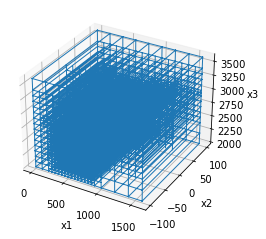

OcTreeMesh: 37.11% filled

Level : Number of cells               Mesh Extent               Cell Widths    
-----------------------           min     ,     max            min   ,   max   
  1   :       14             ---------------------------   --------------------
  2   :       242         x:      0.0     ,   1600.0          50.0   ,   200.0   
  3   :      1264         y:    -100.0    ,    100.0          50.0   ,   200.0   
-----------------------   z:    2000.0    ,   3600.0          50.0   ,   200.0   
Total :      1520

In [3]:
ex.mesh.plotGrid(show_it=True)
ex.mesh

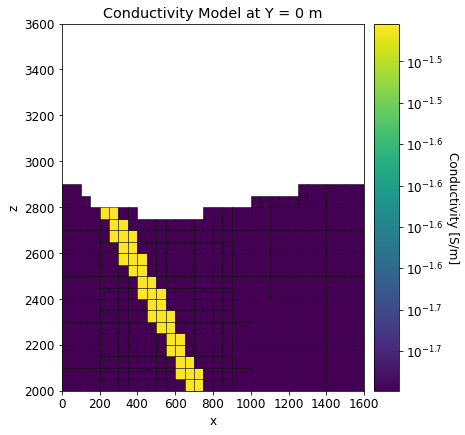

In [4]:
ex.plot_slice()

In [5]:
ex.simulate();

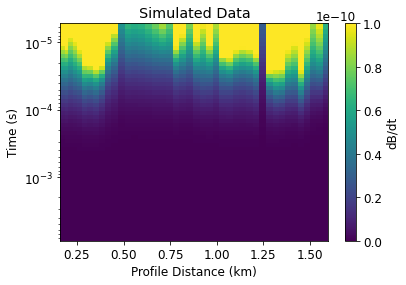

In [6]:
ex.plot_data()

# Monte Carlo

In [7]:
MCfolder = '../data/tmp/'
N=50

dip = [25, 165] #uniform
H = [120, 40] #normal
xpos = [400,40] #normal
rho_fault = [20, 10, .45] #lognormal
rho_back = [40, 30, .8] #lognormal

dep = 1000 #Minimum depth within domain (m)
xtra = 1000 #Buffer on each end of electrodes
dh = 50
y0 = 100
ny = 11

seed = 0
overwrite = True
parallel = False
nproc = None
showDists = True
saveParams=True

In [8]:
MC = MonteCarlo(dep,
                xtra, 
                dh,
                y0,
                ny,
                dip, 
                H, 
                xpos,
                rho_fault, 
                rho_back, 
                N, 
                MCfolder, 
                overwrite=overwrite, 
                parallel=parallel, 
                nproc=nproc, 
                seed=seed,
                showDists=showDists, 
                saveParams=saveParams)

MC folder already exists. Overwriting.


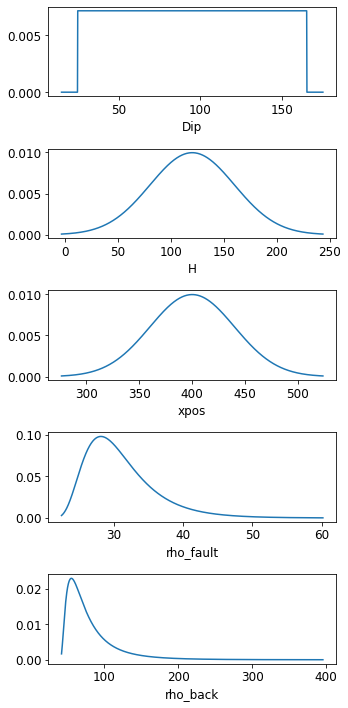

In [9]:
MC.plot_dists(figsize=(5,10))

Fracture dip angle: 125.13
Fracture thickness (m): 198.03
Fracture outcrop x-position (m): 439.07
Fracture zone resistivity (Ohm-m): 33.31
Background resistivity (Ohm-m): 51.78


OcTreeMesh: 34.03% filled

Level : Number of cells               Mesh Extent               Cell Widths    
-----------------------           min     ,     max            min   ,   max   
  1   :       16             ---------------------------   --------------------
  2   :       242         x:      0.0     ,   1600.0          50.0   ,   200.0   
  3   :      1136         y:    -100.0    ,    100.0          50.0   ,   200.0   
-----------------------   z:    2000.0    ,   3600.0          50.0   ,   200.0   
Total :      1394

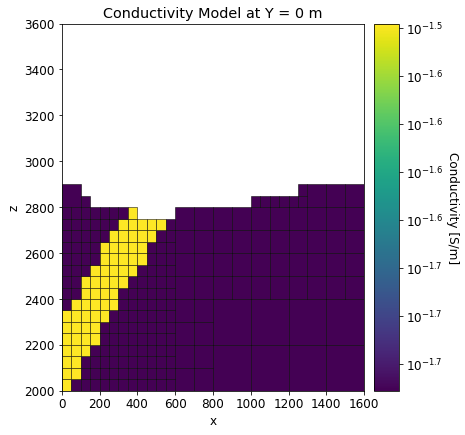

In [10]:
r = 1
print("Fracture dip angle: "+str(np.round(MC.PARAMS[r][1],2)))
print("Fracture thickness (m): "+str(np.round(MC.PARAMS[r][2],2)))
print("Fracture outcrop x-position (m): "+str(np.round(MC.PARAMS[r][3],2)))
print("Fracture zone resistivity (Ohm-m): "+str(np.round(MC.PARAMS[r][4],2)))
print("Background resistivity (Ohm-m): "+str(np.round(MC.PARAMS[r][5],2)))

setup = MC.prepare_realization(r)
setup.plot_slice()
setup.mesh

In [11]:
data = MC.realize(r)

Simulating realization 1


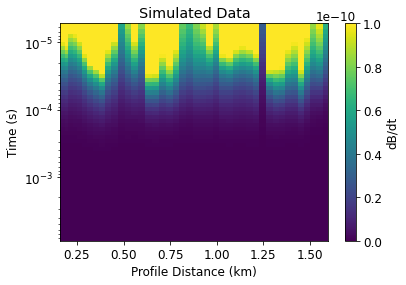

In [12]:
data.plot_data()